In [13]:
import pandas as pd
import yfinance as yf
import numpy as np
import math
import matplotlib as mpl
import matplotlib.pyplot as plt

In [14]:
def get_financial_data(ticker):
    stock = yf.Ticker(ticker)
    #income statement
    ic = stock.financials.T
    #balance sheet
    bs = stock.balance_sheet.T
    #cash flow statement
    cf = stock.cashflow.T
    return ic, bs, cf

In [15]:
# ticker list
Tickers = ["AAPL"]

data = []
#base year: 1968
#https://fred.stlouisfed.org/series/A001RG3A086NBEA
gnp = [669.39, 645.92, 603.36, 577.05] 

for ticker in Tickers:

    ic, bs, cf = get_financial_data(ticker)
    

    

    for j in range(3):
        
        
        # Extract relevant data
        TA_t = bs.get('Total Assets', pd.Series([np.nan, np.nan])).iloc[0 + j]
        CA_t = TA_t - bs.get('Total Non Current Assets', pd.Series([np.nan, np.nan])).iloc[0 + j]
        TL_t = bs.get('Total Liabilities Net Minority Interest', pd.Series([np.nan, np.nan])).iloc[0 + j]
        WC_t = bs.get('Working Capital', pd.Series([np.nan, np.nan])).iloc[0 + j]
        NI_t = ic.get('Net Income', pd.Series([np.nan, np.nan])).iloc[0 + j]
        NI_t1 = ic.get('Net Income', pd.Series([np.nan, np.nan])).iloc[1 + j]
        OCF_t = cf.get('Operating Cash Flow', pd.Series([np.nan, np.nan])).iloc[0 + j]
        CL_t = bs.get('Current Liabilities', pd.Series([np.nan, np.nan])).iloc[0 + j]
        GNP = gnp[j]
        X = 0
        if TL_t > TA_t:
            X = 1
        Y = 0
        if NI_t < 0 and NI_t1 < 0:
            Y = 1
        
        Oscore = -1.32 - 0.407*math.log(TA_t/GNP) + 6.03*(TL_t/TA_t) - 1.43*(WC_t/TA_t) + 0.0757*(CL_t/CA_t) - 1.72*X - 2.37*(NI_t/TA_t) - 1.83*(OCF_t/TL_t) + 0.285*Y - 0.521*((NI_t - NI_t1)/(abs(NI_t) + abs(NI_t1)))
        Default = math.exp(Oscore) / (1 + math.exp(Oscore))
        # Append to the dataset 
        data.append([ticker, 2023 - j, Oscore, Default])



In [16]:
# Create DataFrame 
columns = ["Company Ticker", "Year", "O-score", "Prob"]
Tickers_df = pd.DataFrame(data, columns=columns)

In [17]:
# Display the dataset
Tickers_df

,Company Ticker,Year,O-score,Prob
0,AAPL,2023,-5.783673,0.003068
1,AAPL,2022,-5.607207,0.003658
2,AAPL,2021,-5.983634,0.002513


In [20]:
# Plotting function
def plot_o_score(ticker, df):
    df_ticker = df[df['Company Ticker'] == ticker]
    plt.figure(figsize=(10, 6))
    plt.plot(df_ticker['Year'], df_ticker['O-score'], marker='o')
    plt.xlabel('Year')
    plt.ylabel('O-score')
    plt.title(f'{ticker} O-score')
    plt.grid(True)
    plt.show()

# Plotting function
def plot_default_prob(ticker, df):
    df_ticker = df[df['Company Ticker'] == ticker]
    plt.figure(figsize=(10, 6))
    plt.plot(df_ticker['Year'], df_ticker['Prob'], marker='o')
    plt.xlabel('Year')
    plt.ylabel('Default_prob')
    plt.title(f'{ticker} Default_prob')
    plt.grid(True)
    plt.show()

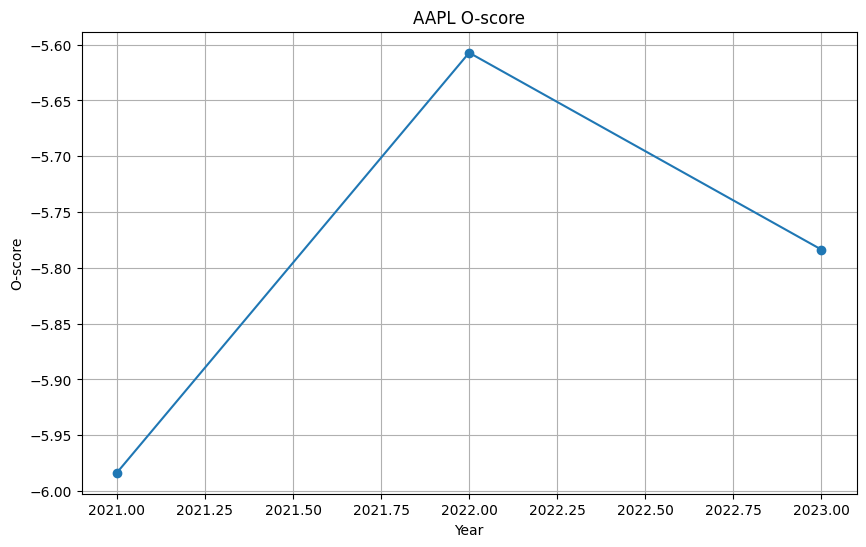

In [19]:
# Plot the M-score for the given ticker
plot_o_score("AAPL", Tickers_df)

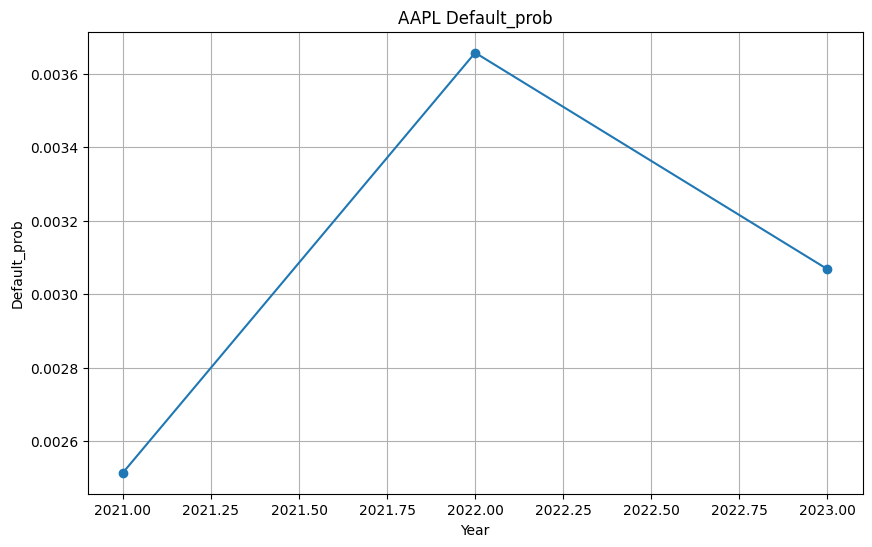

In [21]:
plot_default_prob("AAPL", Tickers_df)